In [2]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### svd approach (irrelavent to this coursework) 
### skip this part 

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app


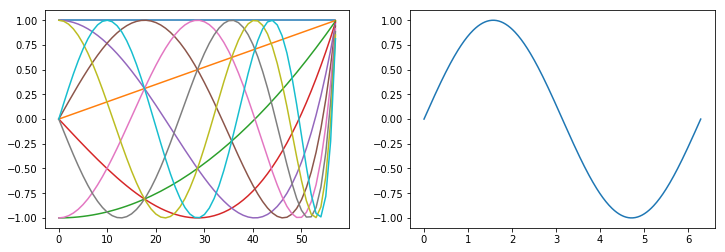

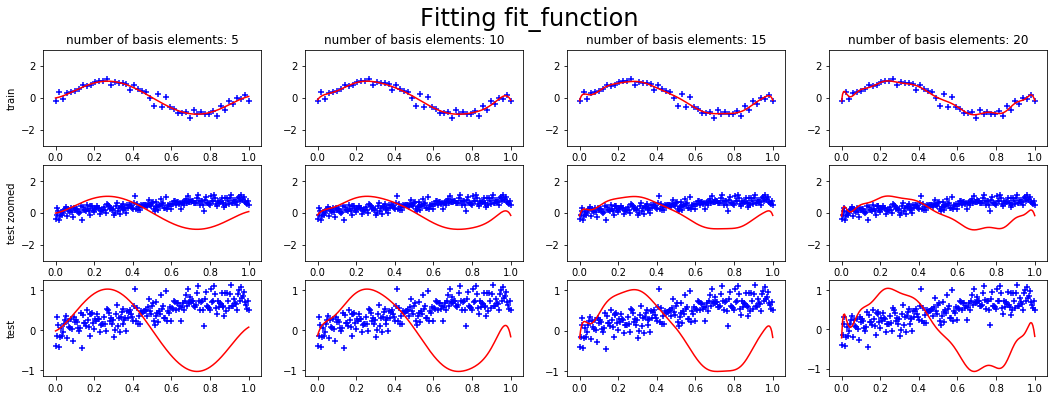

In [17]:
def chf(x, n): # These are the basis functions to be used
    return np.cos(n*np.arccos(x)) 
def fit_function(x):
    #noise = np.random.rand(1)/10
    return np.sin(x)

x = np.linspace(0, 2*np.pi, 360)
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
for n in range(10):
    ax[0].plot(chf(x,n))
ax[1].plot(x, fit_function(x))

# svd approach  however, this is irrelavent to this coursework
num_basis = [5, 10, 15, 20]
noise = 0.2
fig, ax = plt.subplots(nrows=3,ncols=len(num_basis),figsize=(18,6))
ntrain=50
Xtrain=np.linspace(0,1,ntrain)
#normalize
ytrain=np.atleast_2d(fit_function(Xtrain*2*np.pi)+noise*np.random.normal(0,1,ntrain)).T 
#ytrain.pd.dropna(inplace=True)

ntest=200
Xtest=np.linspace(0,1,ntest)
ytest=fit_function(Xtest)+noise*np.random.normal(0,1,ntest)


for i, nb in enumerate(num_basis):
    ax[0][i].scatter(Xtrain,ytrain,marker='+',color='b')
    Amat = [np.ones(ntrain)]
    Amat_test = [np.ones(ntest)]
    for n in range(nb):
        Amat.append(chf(Xtrain,n+1))
    Amat = np.vstack(Amat).T
    what = np.linalg.pinv(Amat).dot(ytrain)
    y1train=Amat.dot(what)
    for n in range(nb):
        Amat_test.append(chf(Xtest,n+1))
    Amat_test = np.vstack(Amat_test).T
    ypred=Amat_test.dot(what)
    ax[1][i].scatter(Xtest,ytest,color='b',marker='+')
    ax[0][i].plot(Xtest,ypred,color='r')
    ax[1][i].plot(Xtest,ypred,color='r')
    ax[0][i].set_ylim([-3,3])
    ax[1][i].set_ylim([-3,3])
    ax[2][i].scatter(Xtest,ytest,color='b',marker='+')
    ax[2][i].plot(Xtest,ypred,color='r')
    title = "number of basis elements: "+str(num_basis[i])
    ax[0][i].set_title(title)
ax[0][0].set_ylabel('train')
ax[1][0].set_ylabel('test zoomed')
ax[2][0].set_ylabel('test')
fig.suptitle(r'Fitting fit_function',fontsize=24)

### linear regression approach

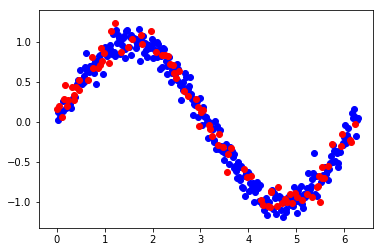

In [24]:
# linear regression approach
from sklearn.model_selection import train_test_split

def f(x):
    return np.sin(x)

X=np.linspace(0, 2*np.pi,180)
y= f(X)+np.random.normal(0,0.1,180)  # np.sqrt(np.abs(X))*
X = np.atleast_2d(X).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
plt.scatter(X_train,y_train, c='b')
plt.scatter(X_test, y_test, c='r')

In [11]:
def polyfn(X, wtvector):
    w = np.asarray(wtvector)
    n = len(w)
    out = 0 
    for i in range(n):
        out += w[n-i-1]*np.power(X, i) # w[n-1]*1 + w[n-2]*x + w[n-3]*(x**2) + ... + w[0]*(x**(n-1))
    return out


def designmatpoly(X):
    X = X[:,0]
    eye = np.ones(X.shape)
    Xsq = polyfn(X, [1,0,0] ) # equivalent to np.square(X)
    return np.stack((eye, X, Xsq)).T

A_train = designmatpoly(X_train)
A_test = designmatpoly(X_test)

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly2feat = PolynomialFeatures(degree =2, include_bias = True)
A_test_sklearn = poly2feat.fit_transform(X_test) # scikit-learn's design matrix
print(np.sum(A_test - A_test_sklearn)**2) # print sum of squares of the entries of the matrix of differences

0.0


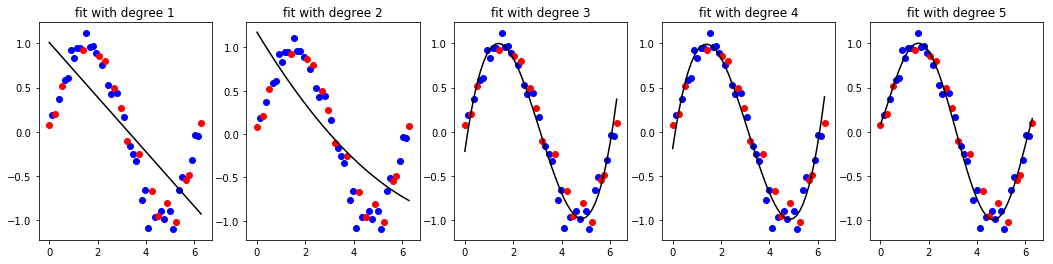

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

fig, ax = plt.subplots(figsize=(18,4),nrows=1, ncols=5,sharex='col')

for d in range(5):
    features = PolynomialFeatures(degree = d+1, include_bias = True)
    X_feature = features.fit_transform(X)
    X_feature_train =  features.fit_transform(X_train)
    X_feature_test =  features.fit_transform(X_test)
    regress = LinearRegression()
    regress.fit(X_feature_train, y_train)
    y_predict=regress.predict(X_feature_test)
    y_model = regress.predict(X_feature)
#    print(linear_reg.coef_, linear_reg.intercept_)
    ax[d].scatter(X_train,y_train, c='b')
    ax[d].scatter(X_test, y_test, c='r')
    ax[d].plot(X, y_model, c='k')
    title = 'fit with degree '+str(d+1)
    ax[d].set_title(title)